In [86]:
import numpy as np
import finesse
from finesse.knm import Map
from finesse.utilities.maps import circular_aperture
import matplotlib.pyplot as plt

# Always worth using a different x/y size to ensure you plot the
# correct variable later and do not transpose anything by accident
n = 100
y_points = np.linspace(-0.17, 0.17, n)
z_points = np.linspace(-0.17, 0.17, n)
yv, zv = np.meshgrid(y_points, z_points)
R = np.sqrt(yv**2 + zv**2)
Rc = -44
map_file = np.loadtxt('phase_map1.txt')
opd = map_file *1995e-9 /(np.pi*2) 
my_map = Map(
    y_points,
    z_points,
    opd=opd 
)


In [87]:
yv.shape

(100, 100)

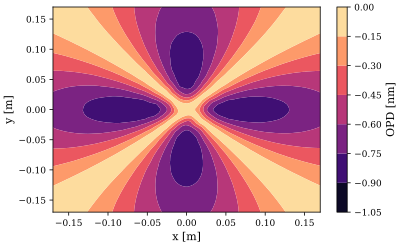

In [88]:
plt.figure()
plt.contourf(my_map.x, my_map.y, my_map.opd/1e-9)
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.colorbar(label='OPD [nm]')

In [89]:

finesse.init_plotting()

model = finesse.Model()
model.parse(
    """
    l l1
    mod mod1 f=9.1M midx=0.1
    m m1 R=0.984 T=0.014 Rc=-1940
    m m2 R=1 T=0 Rc=2245
    link(l1, mod1, m1, 3994, m2)
    cav cavity m2.p1.o
    modes(maxtem=2)

    fd E_arm m2.p1.i l1.f  # Field detector
    """
)

In [90]:
sol = model.run(
    """
    series(
        eigenmodes(cavity, -mod1.f, name="l9"),
        eigenmodes(cavity, 0,       name="c0"),
        eigenmodes(cavity, mod1.f,  name="u9"),
        xaxis(m2.phi, lin, -10, 190, 500, name="scan")
    )
    """
)

print(sol)

- Solution Tree
○ series - SeriesSolution
├──○ l9 - EigenmodesSolution
├──○ c0 - EigenmodesSolution
├──○ u9 - EigenmodesSolution
╰──● scan - ArraySolution


In [91]:
sol_c0 = sol["c0"]

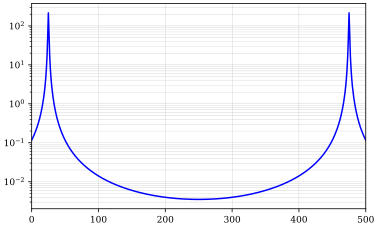

In [92]:
plt.semilogy(abs(sol["scan"]["E_arm"])**2);

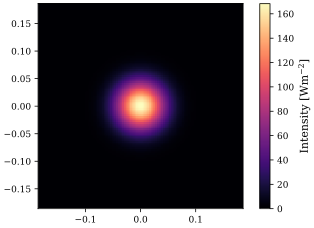

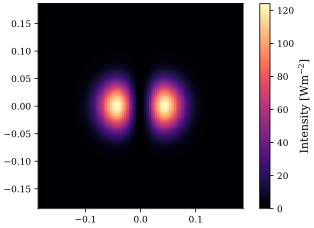

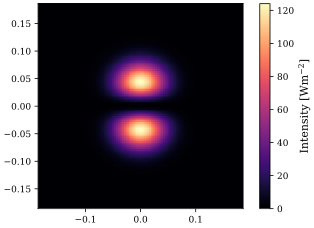

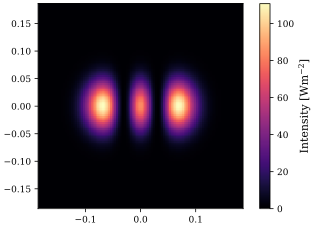

In [93]:
from finesse.plotting import plot_field

plot_field(
    model.homs,
    sol["c0"].eigvectors[:, 0],
    model.cavity.source.q
)
sol["c0"].plot_field(mode_idx=1)
sol["c0"].plot_field(mode_idx=2)
sol["c0"].plot_field(mode_idx=3)

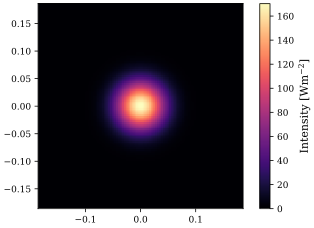

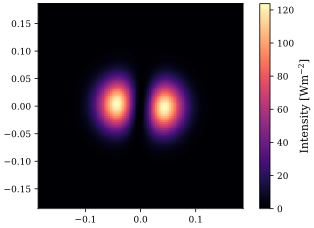

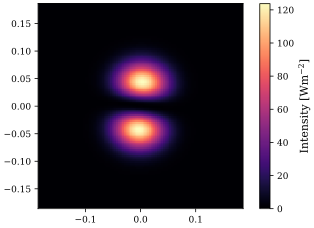

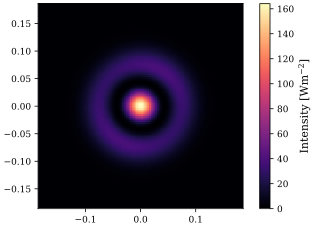

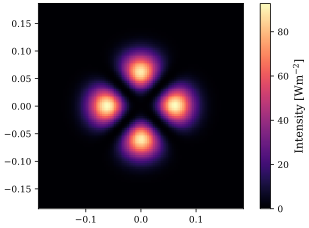

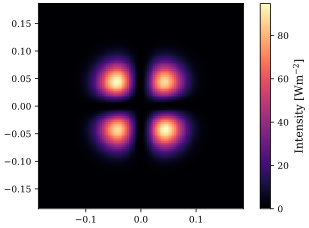

In [83]:

model.m1.surface_map = my_map
model.m2.surface_map = my_map


sol_aperture = model.run("eigenmodes(cavity, 0, name='c0')")

for i in range(len(model.homs)):
    plot_field(
        model.homs,
        sol_aperture.eigvectors[:, i],
        model.cavity.source.q
    )

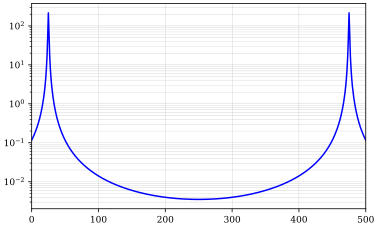